<font size = "4">

Rough draft of another example with "long" and "wide" format. I will fill in more notes later.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_wide = pd.DataFrame({
    "date": pd.date_range("2025-01-01", periods=5, freq="D"),
    "temp_NY": [30, 28, 29, 32, 31],
    "temp_LA": [60, 61, 60, 59, 58],
    "temp_CHI": [25, 24, 26, 27, 28],
    "precip_NY": [0.1, 0.0, 0.0, 0.2, 0.0],
    "precip_LA": [0.0, 0.0, 0.0, 0.0, 0.0],
    "precip_CHI": [0.2, 0.1, 0.0, 0.0, 0.3],
    "wind_NY": [12, 10, 8, 14, 9],
    "wind_LA": [6, 7, 5, 6, 6],
    "wind_CHI": [18, 17, 19, 20, 21]
})

In [6]:
display(df_wide)

,date,temp_NY,temp_LA,temp_CHI,precip_NY,precip_LA,precip_CHI,wind_NY,wind_LA,wind_CHI
0,2025-01-01,30,60,25,0.1,0.0,0.2,12,6,18
1,2025-01-02,28,61,24,0.0,0.0,0.1,10,7,17
2,2025-01-03,29,60,26,0.0,0.0,0.0,8,5,19
3,2025-01-04,32,59,27,0.2,0.0,0.0,14,6,20
4,2025-01-05,31,58,28,0.0,0.0,0.3,9,6,21


In [7]:
# average precipitation by city

precip_cols = ["precip_NY", "precip_LA", "precip_CHI"]
df_wide[precip_cols].mean()

precip_NY     0.06
precip_LA     0.00
precip_CHI    0.12
dtype: float64

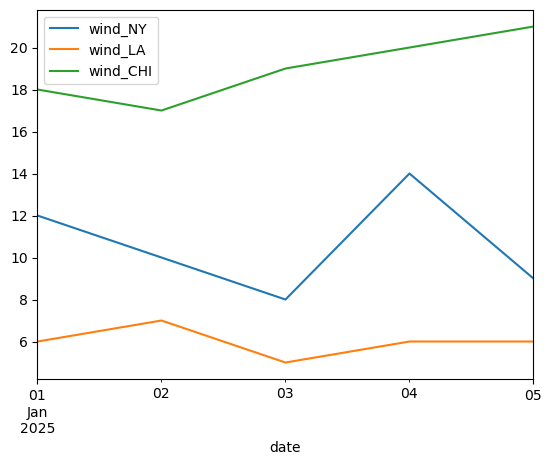

In [8]:
# plot all 3 cities wind speed on same axis

df_wide2 = (df_wide[["date", "wind_NY", "wind_LA", "wind_CHI"]].
    set_index("date").plot())

plt.show()

In [9]:
# "melt" dataset to convert to long format
df_long = df_wide.melt(id_vars="date", var_name="measurement", 
    value_name="value")
display(df_long)

,date,measurement,value
0,2025-01-01,temp_NY,30.0
1,2025-01-02,temp_NY,28.0
2,2025-01-03,temp_NY,29.0
3,2025-01-04,temp_NY,32.0
4,2025-01-05,temp_NY,31.0
5,2025-01-01,temp_LA,60.0
6,2025-01-02,temp_LA,61.0
7,2025-01-03,temp_LA,60.0
8,2025-01-04,temp_LA,59.0
9,2025-01-05,temp_LA,58.0


In [10]:
# Split measurement column:
# "temp_NY" → variable="temp", city="NY"
df_long["variable"] = df_long["measurement"].str.split("_").str[0]
df_long["city"] = df_long["measurement"].str.split("_").str[1]
df_long = df_long.drop(columns="measurement")

display(df_long)

,date,value,variable,city
0,2025-01-01,30.0,temp,NY
1,2025-01-02,28.0,temp,NY
2,2025-01-03,29.0,temp,NY
3,2025-01-04,32.0,temp,NY
4,2025-01-05,31.0,temp,NY
5,2025-01-01,60.0,temp,LA
6,2025-01-02,61.0,temp,LA
7,2025-01-03,60.0,temp,LA
8,2025-01-04,59.0,temp,LA
9,2025-01-05,58.0,temp,LA


In [11]:
# average precipitation by city

df_long.query("variable == 'precip'").groupby("city")["value"].mean()

city
CHI    0.12
LA     0.00
NY     0.06
Name: value, dtype: float64

In [13]:
df_long

,date,value,variable,city
0,2025-01-01,30.0,temp,NY
1,2025-01-02,28.0,temp,NY
2,2025-01-03,29.0,temp,NY
3,2025-01-04,32.0,temp,NY
4,2025-01-05,31.0,temp,NY
5,2025-01-01,60.0,temp,LA
6,2025-01-02,61.0,temp,LA
7,2025-01-03,60.0,temp,LA
8,2025-01-04,59.0,temp,LA
9,2025-01-05,58.0,temp,LA


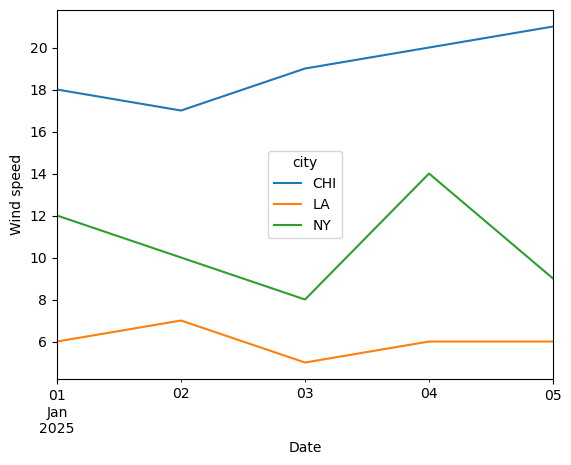

In [14]:
# plot all 3 cities wind speed on same axis

df_wind = (
    df_long[df_long["variable"] == "wind"]
    .pivot(index="date", columns="city", values="value")
)

df_wind.plot() 

plt.ylabel("Wind speed")
plt.xlabel("Date")
plt.show()

In [15]:
df_back2wide = df_long.pivot(
    index="date",
    columns=["variable", "city"],
    values="value"
)

display(df_back2wide)

variable    temp             precip            wind           
city          NY    LA   CHI     NY   LA  CHI    NY   LA   CHI
date                                                          
2025-01-01  30.0  60.0  25.0    0.1  0.0  0.2  12.0  6.0  18.0
2025-01-02  28.0  61.0  24.0    0.0  0.0  0.1  10.0  7.0  17.0
2025-01-03  29.0  60.0  26.0    0.0  0.0  0.0   8.0  5.0  19.0
2025-01-04  32.0  59.0  27.0    0.2  0.0  0.0  14.0  6.0  20.0
2025-01-05  31.0  58.0  28.0    0.0  0.0  0.3   9.0  6.0  21.0

In [ ]:

df_back2wide.columns = [
    f"{var}_{city}" for var, city in df_back2wide.columns
]

# uncomment to reset the index, and make "date" a normal column
# df_back2wide = df_back2wide.reset_index()

display(df_back2wide)

,temp_NY,temp_LA,temp_CHI,precip_NY,precip_LA,precip_CHI,wind_NY,wind_LA,wind_CHI
date,,,,,,,,,
2025-01-01,30.0,60.0,25.0,0.1,0.0,0.2,12.0,6.0,18.0
2025-01-02,28.0,61.0,24.0,0.0,0.0,0.1,10.0,7.0,17.0
2025-01-03,29.0,60.0,26.0,0.0,0.0,0.0,8.0,5.0,19.0
2025-01-04,32.0,59.0,27.0,0.2,0.0,0.0,14.0,6.0,20.0
2025-01-05,31.0,58.0,28.0,0.0,0.0,0.3,9.0,6.0,21.0
